**Classification of Breats Cancer Dataset Using Random Forest, Logistic Regression, SVC, KNN**

# **Import Library**

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Load Data**

In [67]:
# Load dataset kanker dari sklearn
kanker = datasets.load_breast_cancer()

X = kanker.data # Mendefinisikan variabel data
y = kanker.target # Mendefinisikan variabel target

# Mengkonfirmasi data fitur dan target menjadi DataFarame
df_x = pd.DataFrame(X, columns=kanker.feature_names)
df_y = pd.Series(y, name='target')

In [89]:
# Menampilkan DataFrame fitur
df_x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [88]:
# Menampilkan DataFrame target
df_y.head()

,target
0,0
1,0
2,0
3,0
4,0


# **Prepocessing Data**

In [70]:
# Menggabungkan dua DataFrame (fitur dan target)
df = pd.concat([df_x, df_y], axis=1)

# Tampilkan 5 data pertama
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [71]:
# Menampilkan informasi umum DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [72]:
# Cek missing value
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [73]:
# Menampilkan daftar nilai unik dalam kolom target
df['target'].unique()

array([0, 1])

In [74]:
# Memberikan statistik ringkasan untuk kolom numerik
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [75]:
# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

# Normalisasi data untuk algoritma yang sensitif terhadap skala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
# Menghitung proporsi distribusi nilai dalam daftar target
pd.Series(y).value_counts(normalize=True)

,proportion
1,0.627417
0,0.372583


In [78]:
# Cek distribusi variabel target
df['target'].value_counts()

,count
target,
1,357
0,212


1 = Benign

2 = Malignant

# **Training Model**

**Random Forest**

In [79]:
# Membuat dan melatih model Random Forest
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

# Prediksi Model Random Forest
y_pred_rf = RF.predict(X_test)

**Logistic Regression**

In [80]:
# Membuat dan melatih model Logistic Regression
LG = LogisticRegression()
LG.fit(X_train_scaled, y_train)

# Prediksi Model Random Logistic Regression
y_pred_LG = LG.predict(X_test_scaled)

**Support Vector Machine (SVM)**

In [81]:
# Membuat dan melatih model SVM
SVM = SVC(kernel='linear')
SVM.fit(X_train_scaled, y_train)

# Prediksi Model SVM
y_pred_SVM = SVM.predict(X_test_scaled)

**K-Nearest Neighbors (KNN)**

In [82]:
# Membuat dan melatih model KNN
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train_scaled, y_train)

# Prediksi Model KNN
y_pred_KNN = KNN.predict(X_test_scaled)

# **Evaluation and Visualization**

**Evaluasi & Visualisasi Random Forest**

Random Forest Classifier
Akurasi: 95.61%
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[39  3]
 [ 2 70]]

 VISUALISASI


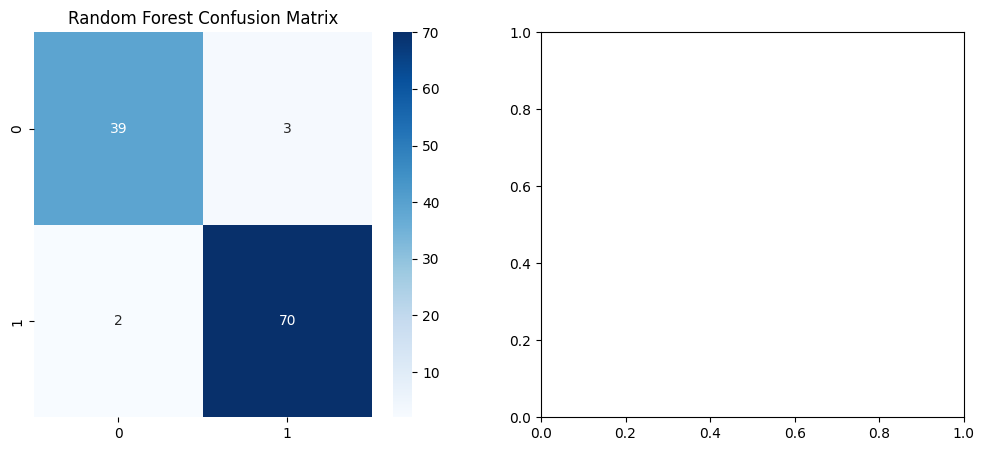

In [83]:
# Evaluasi
print("Random Forest Classifier")
print(f"Akurasi: {accuracy_score(y_test,y_pred_rf)*100:.2f}%")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\n VISUALISASI")

# Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix')

plt.show()

**Evaluasi & Visualisasi Logistic Regression**



Logistic Regression
Akurasi: 98.25%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Confusion Matrix:
 [[41  1]
 [ 1 71]]

 VISUALISASI


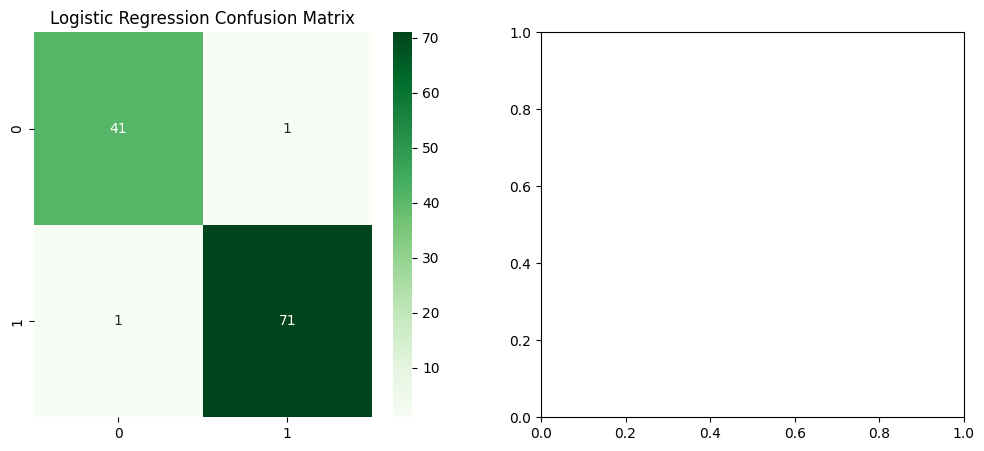

In [84]:
# Evaluasi
print("Logistic Regression")
print(f"Akurasi: {accuracy_score(y_test,y_pred_LG)*100:.2f}%")
print(classification_report(y_test, y_pred_LG))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_LG))
print("\n VISUALISASI")

# Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_LG), annot=True, fmt='d', cmap='Greens', ax=ax[0])
ax[0].set_title('Logistic Regression Confusion Matrix')

plt.show()

**Evaluasi & Visualisasi SVM**

Support Vector Machine (SVM)
Akurasi: 97.37%
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  1]
 [ 2 70]]

 VISUALISASI


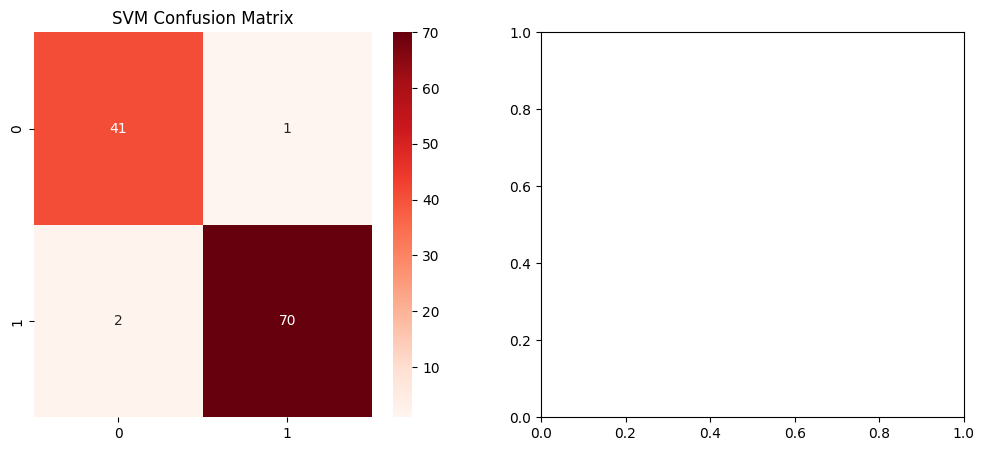

In [85]:
# Evaluasi
print("Support Vector Machine (SVM)")
print(f"Akurasi: {accuracy_score(y_test,y_pred_SVM)*100:.2f}%")
print(classification_report(y_test, y_pred_SVM))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_SVM))
print("\n VISUALISASI")

# Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_SVM), annot=True, fmt='d', cmap='Reds', ax=ax[0])
ax[0].set_title('SVM Confusion Matrix')

plt.show()

**Evaluasi & Visualisasi KNN**

K-Nearest Neighbors (KNN)
Akurasi: 95.61%
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix:
 [[39  3]
 [ 2 70]]

 VISUALISASI


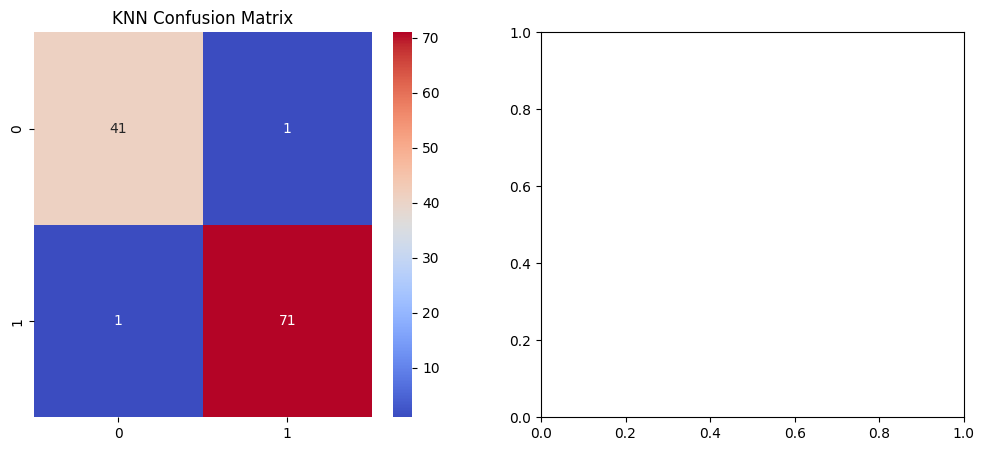

In [86]:
# Evaluasi
print("K-Nearest Neighbors (KNN)")
print(f"Akurasi: {accuracy_score(y_test,y_pred_KNN)*100:.2f}%")
print(classification_report(y_test, y_pred_KNN))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_KNN))
print("\n VISUALISASI")

# Visualisasi
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(confusion_matrix(y_test, y_pred_LG), annot=True, fmt='d', cmap='coolwarm', ax=ax[0])
ax[0].set_title('KNN Confusion Matrix')

plt.show()